Question link:https://docs.google.com/document/d/1ij21PzQu8nEl-ET13X7YlWEMrcnBkIU5/edit?rtpof=true&sd=true&tab=t.0

In [ ]:
# !pip install tensorflow scikit-learn matplotlib

# TASK 01

## Load and Prepare the Data

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


wine = load_wine()
X, y = wine.data, wine.target
# print(y)

# One-Hot Encoding
y_categorical = to_categorical(y, num_classes=3)
# print(y_categorical)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133, 3), (45, 3))

## Configuring the Neural Network


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("=== Network Summary ===")
model.summary()
print("\n")

=== Network Summary ===


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 547 (2.14 KB)

 Trainable params: 547 (2.14 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Network

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    validation_split=0.2,
    verbose=0
)

## Evaluate on the Test Set

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"!!! Evaluation on Test Set !!!")
print(f"Test Accuracy: {accuracy * 100:.2f}%\n")

!!! Evaluation on Test Set !!!
Test Accuracy: 100.00%



## Plot Training and Validation Curves

=== Plotting History ===


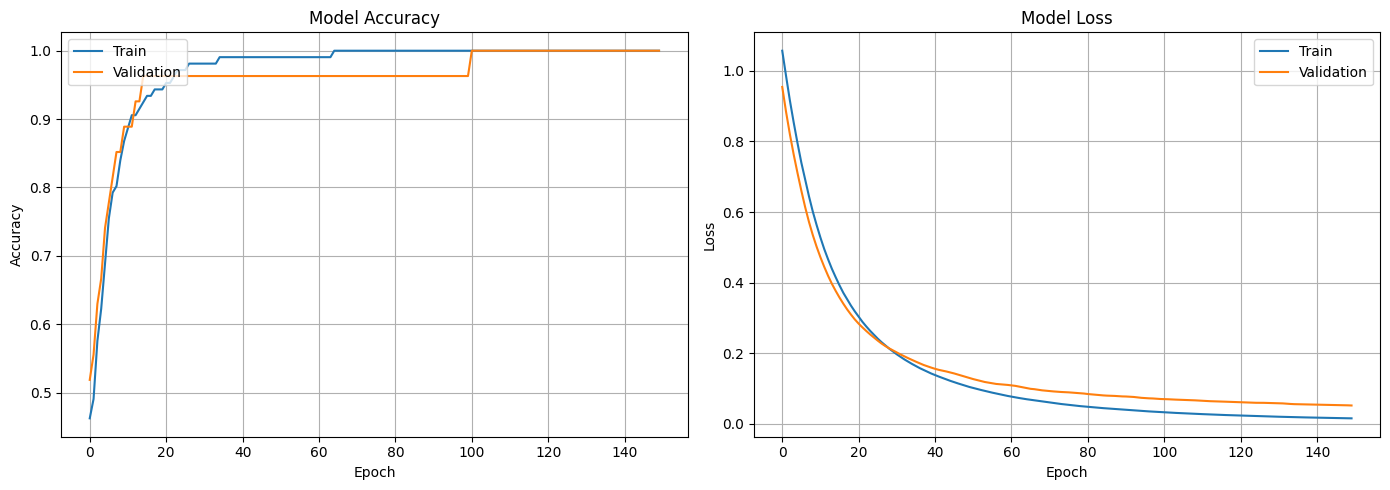

In [ ]:
import matplotlib.pyplot as plt


print("=== Plotting History ===")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax1.grid(True)

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')
ax2.grid(True)

plt.tight_layout()
plt.show()

# TASK 01 END

# ALL Imports

In [ ]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from sklearn.metrics.pairwise import cosine_similarity

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout


# TASK 02

## Load and Pre-Process the Data

In [ ]:
VOCAB_SIZE = 15000  # Limit vocabulary to the top 15,000 words (input dim)
MAX_LEN = 250       # Pad all reviews to a UNIFORM length
EMBEDDING_DIM = 64  # Dimensionality of the word vectors (Output dim)


print("--- Loading data... ---")
(x_train_full, y_train_full), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
print(f"{len(x_train_full)} training sequences")
print(f"{len(x_test)} test sequences")

# Pad Sequences (Uniforming)
x_train_full_padded = pad_sequences(x_train_full, maxlen=MAX_LEN, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

# x_train, x_val, y_train, y_val = train_test_split(
#     x_train_full_padded, y_train_full, test_size=0.25, random_state=42
# )

# with stratify
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full_padded,
    y_train_full,
    test_size=0.25,
    random_state=42,
    stratify=y_train_full
)


print(f"New training set size: {len(x_train)}")
print(f"Validation set size: {len(x_val)}\n")

--- Loading data... ---
25000 training sequences
25000 test sequences
New training set size: 18750
Validation set size: 6250



## Define the Neural Network

In [ ]:
model = Sequential([
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


## Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("--- Network Summary ---")
model.summary()
print("\n")


--- Network Summary ---


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 64)        │       960,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,024,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,984,129 (7.57 MB)

 Trainable params: 1,984,129 (7.57 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Network

In [ ]:
print("--- Starting Training ---")
history = model.fit(
    x_train,
    y_train,
    epochs=13,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)
print("--- Training Finished ---\n")

--- Starting Training ---
Epoch 1/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.6058 - loss: 0.6234 - val_accuracy: 0.7816 - val_loss: 0.5175
Epoch 2/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9318 - loss: 0.1890 - val_accuracy: 0.8448 - val_loss: 0.3825
Epoch 3/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9961 - loss: 0.0278 - val_accuracy: 0.8410 - val_loss: 0.4458
Epoch 4/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9996 - loss: 0.0064 - val_accuracy: 0.8445 - val_loss: 0.4784
Epoch 5/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9998 - loss: 0.0024 - val_accuracy: 0.8475 - val_loss: 0.5046
Epoch 6/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8474 - val_loss: 0.5231
Epoch 7/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 1.0000 - loss: 7.1411e-04 - val_accuracy: 0.8466 - val_loss: 0.5401
Epoch 8/13
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 1

## Evaluate on the Test Set


In [ ]:
loss, accuracy = model.evaluate(x_test_padded, y_test, verbose=0)
print(f"--- Evaluation on Test Set ---")
print(f"Test Accuracy: {accuracy * 100:.2f}%\n")

--- Evaluation on Test Set ---
Test Accuracy: 83.81%



## Plot Training and Validation Curves


=== Plotting History ===


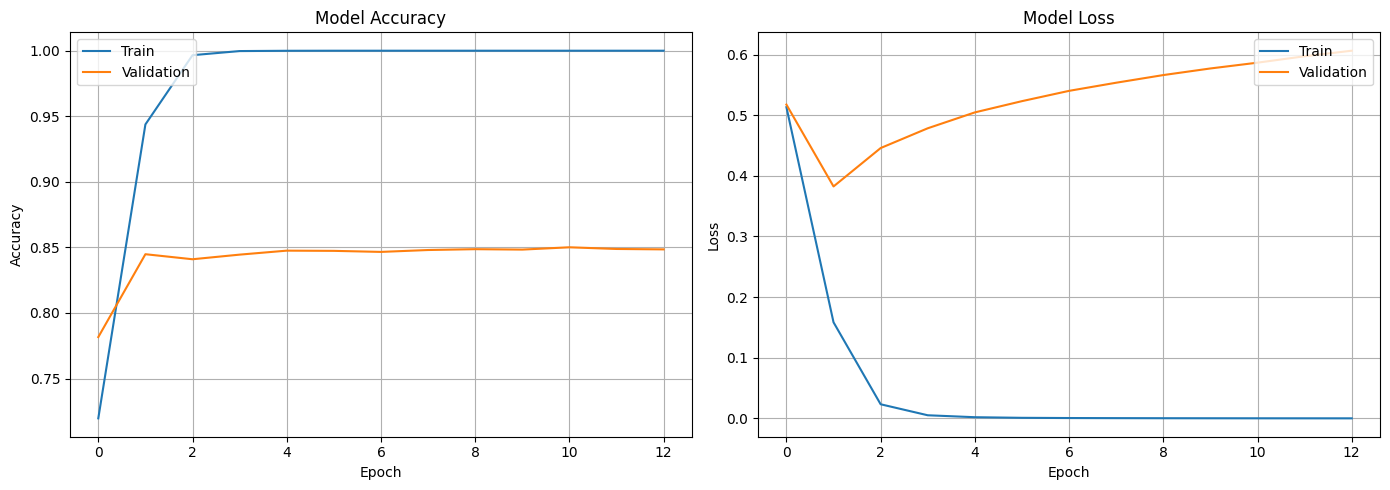

In [ ]:
print("=== Plotting History ===")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax1.grid(True)

# Plot loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')
ax2.grid(True)
plt.tight_layout()
plt.show()


## Plot ROC Curve and Calculate AUC

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

--- Plotting ROC Curve ---


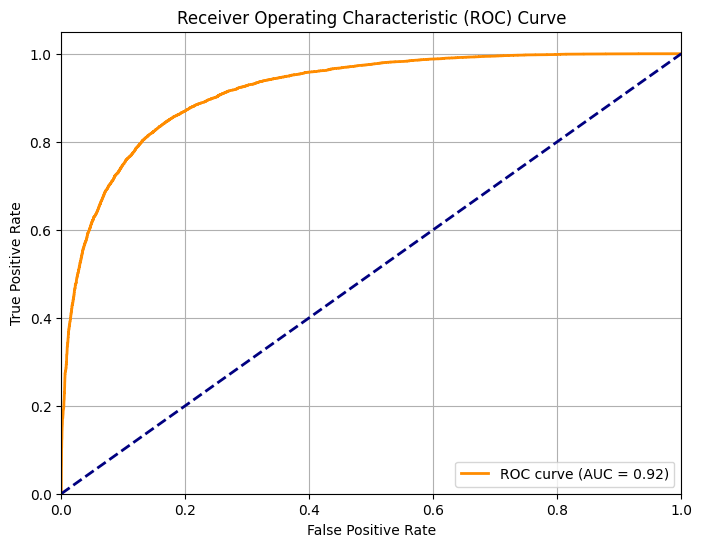

In [ ]:
y_pred_probs = model.predict(x_test_padded).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

auc_score = auc(fpr, tpr)

print("\n--- Plotting ROC Curve ---")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# TASK 02 END

# TASK 03

## Reusing the Dataset

In [ ]:
# 80/20 Split
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full_padded, y_train_full, test_size=0.20, random_state=42, stratify=y_train_full
)

## Configuring the "new" Deep Neural Network

In [ ]:
deep_model = Sequential([
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compile the Model

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

print("--- Deep Model Summary ---")
deep_model.summary()
print("\n")


--- Deep Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 250, 64)        │       960,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     4,096,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,097,473 (19.45 MB)

 Trainable params: 5,097,473 (19.45 MB)

 Non-trainable params: 0 (0.00 B)

## Train the Network and Measure Time

In [ ]:
print("--- Starting Training for Deep Model ---")
start_time = time.time()

history_deep = deep_model.fit(
    x_train,
    y_train,
    epochs=18,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)
end_time = time.time()
deep_model_training_time = end_time - start_time
print("--- Training Finished ---\n")

--- Starting Training for Deep Model ---
Epoch 1/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 137ms/step - accuracy: 0.5687 - loss: 0.6635 - val_accuracy: 0.8340 - val_loss: 0.3791
Epoch 2/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9216 - loss: 0.2120 - val_accuracy: 0.8304 - val_loss: 0.4020
Epoch 3/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.9893 - loss: 0.0379 - val_accuracy: 0.8406 - val_loss: 0.6865
Epoch 4/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.9981 - loss: 0.0068 - val_accuracy: 0.8332 - val_loss: 0.9565
Epoch 5/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 128ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 0.8354 - val_loss: 0.9437
Epoch 6/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 140ms/step - accuracy: 0.9973 - loss: 0.0071 - val_accuracy: 0.8230 - val_loss: 1.0067
Epoch 7/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 141ms/step - accuracy: 0.9970 - loss: 0.0080 - val_accuracy: 0.8382 - val_loss: 0.9785
Epoch 8/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 41

## Evaluate on the Test Set

In [ ]:
loss, accuracy = deep_model.evaluate(x_test_padded, y_test, verbose=0)
deep_model_test_accuracy = accuracy

y_pred_probs = deep_model.predict(x_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step


## Display Results

--- Deep Model Performance ---
Training Time: 544.14 seconds
Test Accuracy: 82.26%



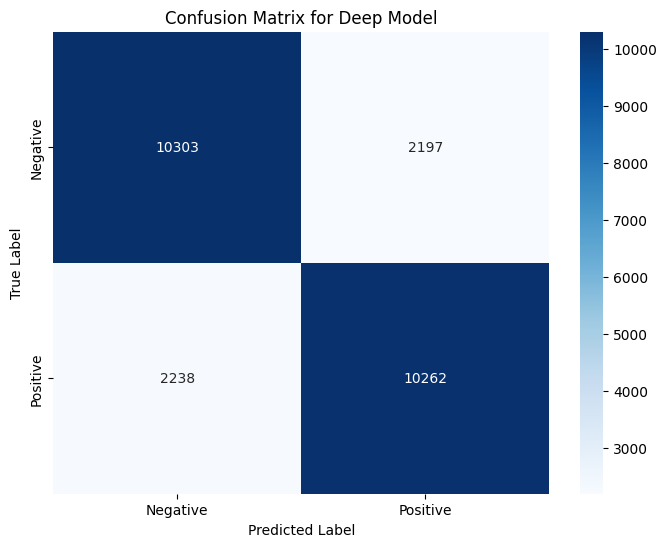

In [ ]:
print(f"--- Deep Model Performance ---")
print(f"Training Time: {deep_model_training_time:.2f} seconds")
print(f"Test Accuracy: {deep_model_test_accuracy * 100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Deep Model')
plt.show()

## Plot Training and Validation Curves


--- Plotting History for Deep Model ---


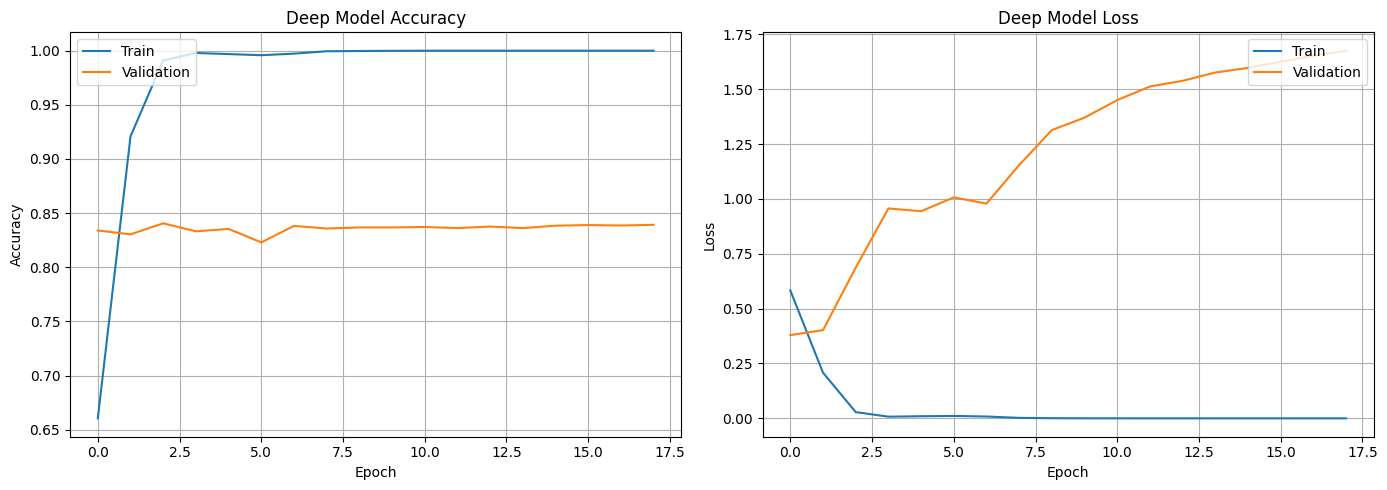


=== Plotting ROC Curve for Deep Model ===


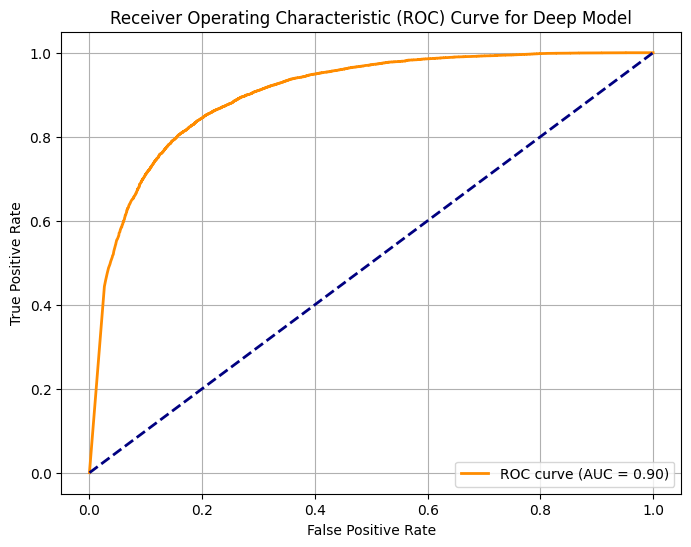

In [ ]:
print("\n--- Plotting History for Deep Model ---")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# Plot accuracy
ax1.plot(history_deep.history['accuracy'])
ax1.plot(history_deep.history['val_accuracy'])
ax1.set_title('Deep Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')
ax1.grid(True)
# Plot loss
ax2.plot(history_deep.history['loss'])
ax2.plot(history_deep.history['val_loss'])
ax2.set_title('Deep Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper right')
ax2.grid(True)
plt.tight_layout()
plt.show()


# --- 8. Plot ROC Curve and Calculate AUC (NEW) ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs.ravel())
auc_score = auc(fpr, tpr)

print("\n=== Plotting ROC Curve for Deep Model ===")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Deep Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# TASK 03 END

# TASK 04

## Load and Preprocess the Dataset

In [ ]:
VOCAB_SIZE = 10000

print("Loading data...")
(x_train, _), (x_test, _) = imdb.load_data(num_words=VOCAB_SIZE)

# Multi-hot Encode the Sequences
def multi_hot_encode(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

print("Vectorizing data...")
x_train_hot = multi_hot_encode(x_train, VOCAB_SIZE)
x_test_hot = multi_hot_encode(x_test, VOCAB_SIZE)
print(f"x_train_hot shape: {x_train_hot.shape}")
print(f"x_test_hot shape: {x_test_hot.shape}\n")

Loading data...
Vectorizing data...
x_train_hot shape: (25000, 10000)
x_test_hot shape: (25000, 10000)



## Configuring the Autoencoder Architecture

In [ ]:
ENCODING_DIM = 64

# Encoder
input_layer = Input(shape=(VOCAB_SIZE,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(ENCODING_DIM, activation='relu')(encoded)

# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(VOCAB_SIZE, activation='sigmoid')(decoded)

# Autoencoder Model
autoencoder = Model(input_layer, decoded)

## Compile and Train the Model

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
print("--- Autoencoder Summary ---")
autoencoder.summary()
print("\n")

print("--- Starting Training ---")
history = autoencoder.fit(
    x_train_hot,
    x_train_hot,  # Note: The input and target are the same
    epochs=22,
    batch_size=64,
    shuffle=True,
    validation_split=0.2,
    verbose=1
)
print("--- Training Finished ---\n")

--- Autoencoder Summary ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10000)          │     1,290,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,704 (9.87 MB)

 Trainable params: 2,586,704 (9.87 MB)

 Non-trainable params: 0 (0.00 B)



--- Starting Training ---
Epoch 1/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.1642 - val_loss: 0.0457
Epoch 2/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.0449 - val_loss: 0.0448
Epoch 3/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - loss: 0.0438 - val_loss: 0.0445
Epoch 4/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0437 - val_loss: 0.0441
Epoch 5/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0432 - val_loss: 0.0435
Epoch 6/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0425 - val_loss: 0.0430
Epoch 7/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0424 - val_loss: 0.0426
Epoch 8/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - loss: 0.0417 - val_loss: 0.0422
Epoch 9/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0407 - val_loss: 0.0419
Epoch 10/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.0404 - val_loss: 0.0416
Epoch 11/22
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0400 - val_loss: 0.0413
Ep

## Evaluate the Model

--- Plotting History ---


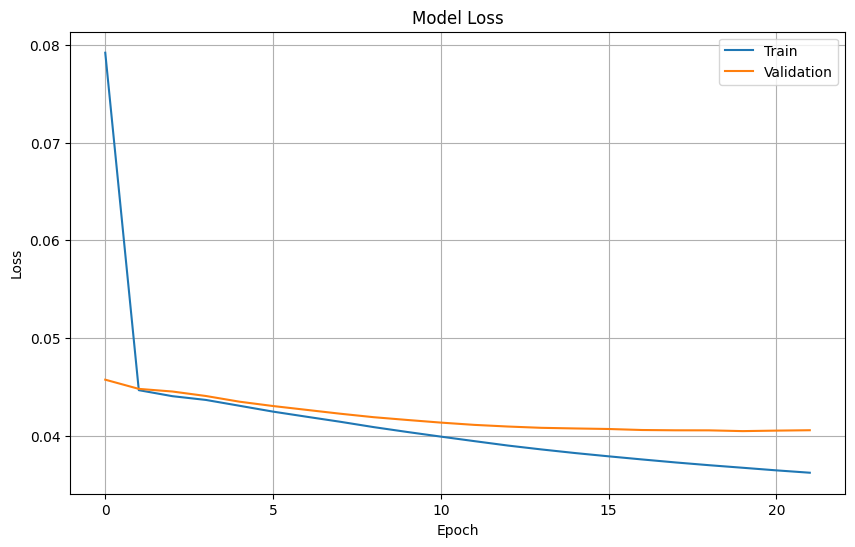


--- Evaluation on Test Set ---
Test Set Reconstruction Error (Loss): 0.0397

--- Calculating Cosine Similarity for 5 Random Reviews ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Review #1 (index 9286): Cosine Similarity = 0.5876
Review #2 (index 14417): Cosine Similarity = 0.5385
Review #3 (index 23097): Cosine Similarity = 0.6156
Review #4 (index 10358): Cosine Similarity = 0.5020
Review #5 (index 21069): Cosine Similarity = 0.6063


In [ ]:
# --- Plot Training and Validation Loss ---
print("--- Plotting History ---")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

reconstruction_error = autoencoder.evaluate(x_test_hot, x_test_hot, verbose=0)
print(f"\n--- Evaluation on Test Set ---")
print(f"Test Set Reconstruction Error (Loss): {reconstruction_error:.4f}\n")


print("--- Calculating Cosine Similarity for 5 Random Reviews ---")

sample_indices = np.random.choice(x_test_hot.shape[0], 5, replace=False)

original_vectors_sample = x_test_hot[sample_indices]

reconstructed_vectors_sample = autoencoder.predict(original_vectors_sample)

for i in range(len(sample_indices)):
    original_vector = original_vectors_sample[i].reshape(1, -1)
    reconstructed_vector = reconstructed_vectors_sample[i].reshape(1, -1)

    similarity = cosine_similarity(original_vector, reconstructed_vector)[0][0]

    print(f"Review #{i+1} (index {sample_indices[i]}): Cosine Similarity = {similarity:.4f}")